In [1]:
suppressPackageStartupMessages({
    library(monocle)
    
    library(RColorBrewer)
    library(dplyr)
    library(ggplot2)
    library(reshape2)
    library(scales)
})

Warning message:
“replacing previous import by ‘splines::splineDesign’ when loading ‘VGAM’”Warning message:
“replacing previous import by ‘grid::arrow’ when loading ‘monocle’”Warning message:
“replacing previous import by ‘grid::unit’ when loading ‘monocle’”Warning message:
“replacing previous import by ‘igraph::clusters’ when loading ‘monocle’”Warning message:
“replacing previous import by ‘ggplot2::Position’ when loading ‘monocle’”

This analysis was made using Monocle version 2.3.5. The source code for Monocle 2.3.5 is available as a supplementary file to Cao et al. 2017 on the Science website. We are working on updating the analysis to the latest version of Monocle.

In [2]:
sessionInfo()

R version 3.2.1 (2015-06-18)
Platform: x86_64-unknown-linux-gnu (64-bit)
Running under: CentOS release 6.8 (Final)

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] splines   stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] scales_0.4.1        reshape2_1.4.2      dplyr_0.7.1        
 [4] RColorBrewer_1.1-2  monocle_2.3.5       DDRTree_0.1.5      
 [7] irlba_2.2.1         VGAM_1.0-3          ggplot2_2.2.1      
[10] Biobase_2.30.0      BiocGenerics_0.16.1 Matrix_1.2-7.1     

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.11           bindr_0.1              plyr_1

In [19]:
# at certain "checkpoints" in this notebook, we save our progress to this RData file
# run this cell to load your progress if you have already reached through one or more checkpoints in the notebook
load("RData/L2.experiment.2.RData")

In [3]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/Cao_et_al_2017.experiment.2.counts.mm",
    destfile = "RData/Cao_et_al_2017.experiment.2.counts.mm")

In [4]:
df = read.table(
    "RData/Cao_et_al_2017.experiment.2.counts.mm",
    sep = ",",
    col.names = c("gene.idx", "cell.idx", "count"),
    colClasses = c("integer", "integer", "integer"))

head(df)

gene.idx,cell.idx,count
93211,28,1
27747,28,1
21301,28,3
22621,28,3
1623,28,2
21085,28,1


In [5]:
mat = sparseMatrix(i = df$gene.idx, j = df$cell.idx, x = df$count)
mat[1:10,1:10]

10 x 10 sparse Matrix of class "dgCMatrix"
                         
 [1,] . . . . . . . . . .
 [2,] . . . . . . . . . .
 [3,] . . . . . . . . . .
 [4,] . . . . . . . . . .
 [5,] . . . . . . . . . .
 [6,] . . . . . . . . 1 .
 [7,] . . . . . . . . . .
 [8,] . . . . . . . . . .
 [9,] . . . . . . . . . .
[10,] . . . . . . . . . .

In [6]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/Cao_et_al_2017.experiment.2.cell.annotations.tsv",
    destfile = "RData/Cao_et_al_2017.experiment.2.cell.annotations.tsv")

In [7]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/Cao_et_al_2017.experiment.2.gene.annotations.tsv",
    destfile = "RData/Cao_et_al_2017.experiment.2.gene.annotations.tsv")

In [8]:
cell.annotations = read.table(
    "RData/Cao_et_al_2017.experiment.2.cell.annotations.tsv",
    sep = ",", col.names = c("cell", "cell.idx"))

gene.annotations = read.csv(
    "RData/Cao_et_al_2017.experiment.2.gene.annotations.tsv",
    col.names = c("gene", "gene.type", "exon.intron", "symbol", "gene.idx"), header=F)

head(cell.annotations)
head(gene.annotations)

cell,cell.idx
cele-all-001.GCTCTCGCCT,1
cele-all-001.ACTCTCTCAA,2
cele-all-001.ATGAACGCGC,3
cele-all-001.CCGGCGGCGA,4
cele-all-001.ACGGAGAATA,5
cele-all-001.GGTAAGCTCT,6


gene,gene.type,exon.intron,symbol,gene.idx
WBGene00023193,snoRNA,exon,no_name,1
WBGene00023193_intron,snoRNA,intron,no_name_intron,2
WBGene00022277,protein_coding,exon,homt-1,3
WBGene00022277_intron,protein_coding,intron,homt-1_intron,4
WBGene00022276,protein_coding,exon,nlp-40,5
WBGene00022276_intron,protein_coding,intron,nlp-40_intron,6


In [9]:
nrow(mat) == nrow(gene.annotations$gene)
ncol(mat) == nrow(cell.annotations$cell)
rownames(mat) = as.character(gene.annotations$gene)
colnames(mat) = as.character(cell.annotations$cell)
mat[1:10,1:10]

logical(0)

logical(0)

   [[ suppressing 10 column names ‘cele-all-001.GCTCTCGCCT’, ‘cele-all-001.ACTCTCTCAA’, ‘cele-all-001.ATGAACGCGC’ ... ]]


10 x 10 sparse Matrix of class "dgCMatrix"
                                         
WBGene00023193        . . . . . . . . . .
WBGene00023193_intron . . . . . . . . . .
WBGene00022277        . . . . . . . . . .
WBGene00022277_intron . . . . . . . . . .
WBGene00022276        . . . . . . . . . .
WBGene00022276_intron . . . . . . . . 1 .
WBGene00022278        . . . . . . . . . .
WBGene00022278_intron . . . . . . . . . .
WBGene00235381        . . . . . . . . . .
WBGene00235381_intron . . . . . . . . . .

In [10]:
mat.exon = mat[gene.annotations$exon.intron == "exon",]
mat.intron = mat[gene.annotations$exon.intron == "intron",]
nrow(mat.exon) == nrow(mat.intron)
mat = mat.exon + mat.intron
mat = mat[order(rownames(mat)),]
rm(list=c("df", "mat.exon", "mat.intron"))

[1] TRUE

In [12]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/C.elegans.WB253.gene.id.to.symbol",
    destfile = "RData/C.elegans.WB253.gene.id.to.symbol.tsv")

In [13]:
gene.symbols = read.table(
    "RData/C.elegans.WB253.gene.id.to.symbol.tsv",
    col.names = c("gene", "symbol"), colClasses = rep("character", 2))

rownames(gene.symbols) = gene.symbols$gene

sum(rownames(mat) %in% rownames(gene.symbols))
mat = mat[rownames(mat) %in% rownames(gene.symbols),]
dim(mat)

[1] 20271

[1] 20271 11334

In [14]:
pd = new("AnnotatedDataFrame", data = data.frame(
    cell = colnames(mat),
    row.names = colnames(mat),
    n.umi = colSums(mat),
    plate = sapply(colnames(mat), function(x) strsplit(x, "-")[[1]][2])))
        
fd = new("AnnotatedDataFrame", data = data.frame(
    gene = gene.symbols$gene,
    symbol = gene.symbols$symbol,
    row.names = gene.symbols$gene))

cds = newCellDataSet(mat, phenoData = pd, featureData = fd, expressionFamily = negbinomial.size())
rm(mat)

In [15]:
sum(pData(cds)$n.umi < 200) / nrow(pData(cds))

[1] 0.3537145

In [18]:
pData(cds) %>% group_by(plate) %>% summarize(med.n.umi = median(n.umi))

plate,med.n.umi
all,474
extrahigh,813
high,725


In [17]:
original.cds = cds
cds = original.cds[, pData(cds)$n.umi >= 200]
dim(cds)

Features  Samples 
   20271     7325

In [13]:
cds = estimateSizeFactors(cds)
cds = estimateDispersions(cds)
cds = detectGenes(cds, 0.1)

Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message in `[<-.data.frame`(`*tmp*`, res$mu == 0, value = structure(list(:
“provided 1 variable to replace 0 variables”Warning message in `[<-.data.frame`(`*tmp*`, res$mu == 0, value = structure(list(:
“provided 1 variable to replace 0 variables”Removing 489 outliers


Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

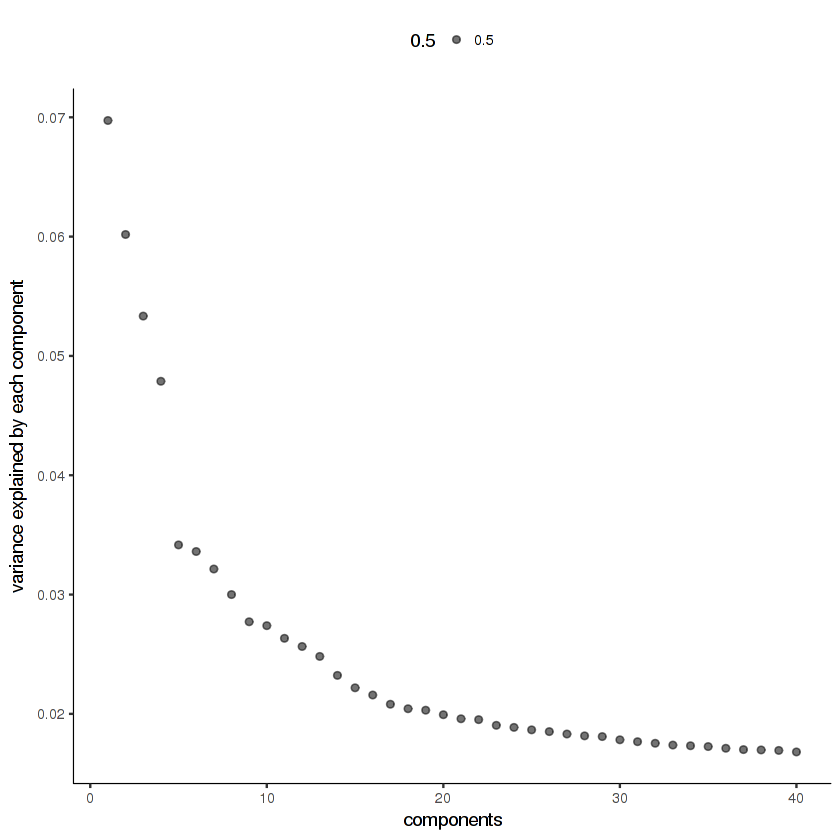

In [15]:
plot_pc_variance_explained(cds)

In [14]:
set.seed(42)
cds = reduceDimension(
    cds, max_components = 2, norm_method = "log",
    num_dim = 40, reduction_method = "tSNE",
    verbose = T)

pData(cds)$tsne_1 = reducedDimA(cds)[1,]
pData(cds)$tsne_2 = reducedDimA(cds)[2,]

Remove noise by PCA ...
Reduce dimension by tSNE ...


Distance cutoff calculated to 3.063367 


the length of the distance: 26824150


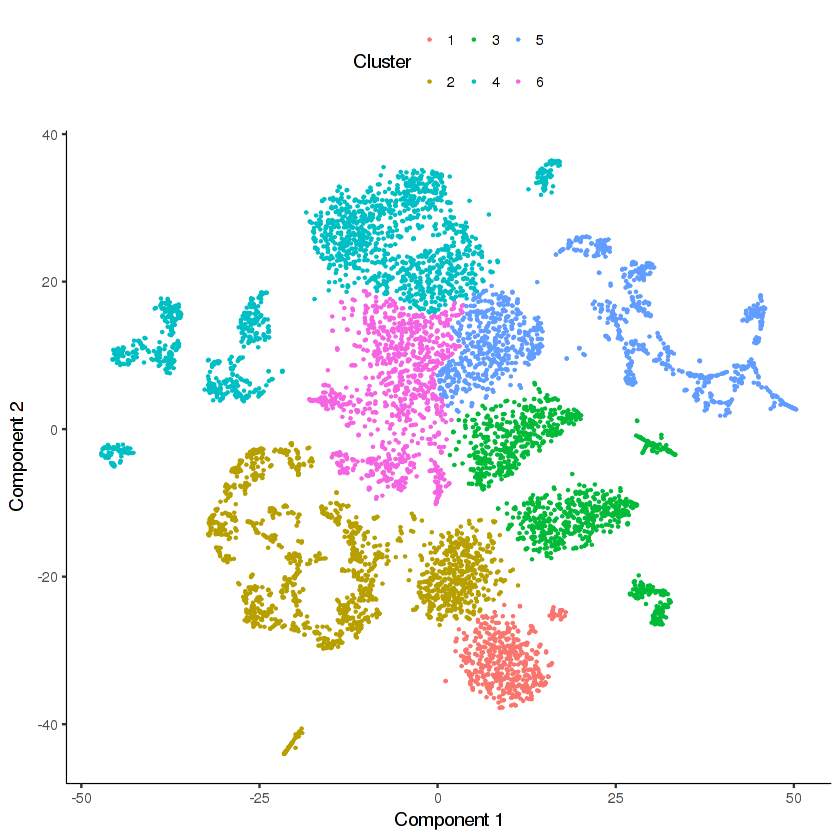

In [16]:
cds = clusterCells_Density_Peak(cds)
plot_cell_clusters(cds, cell_size = 0.2)

Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

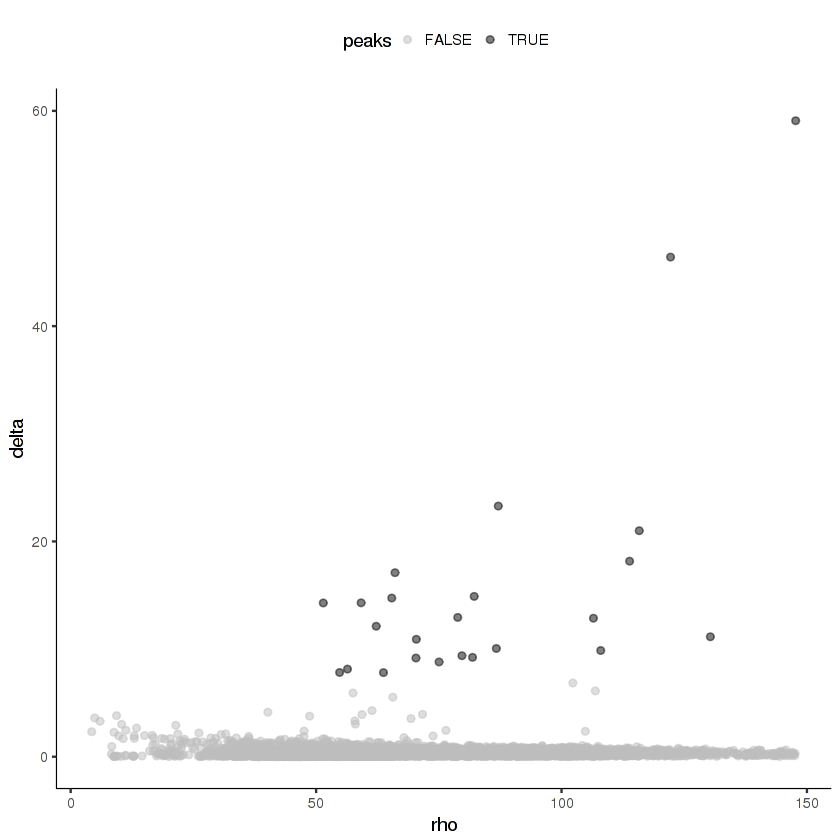

In [17]:
plot_rho_delta(cds, rho_threshold = 10, delta_threshold = 7)

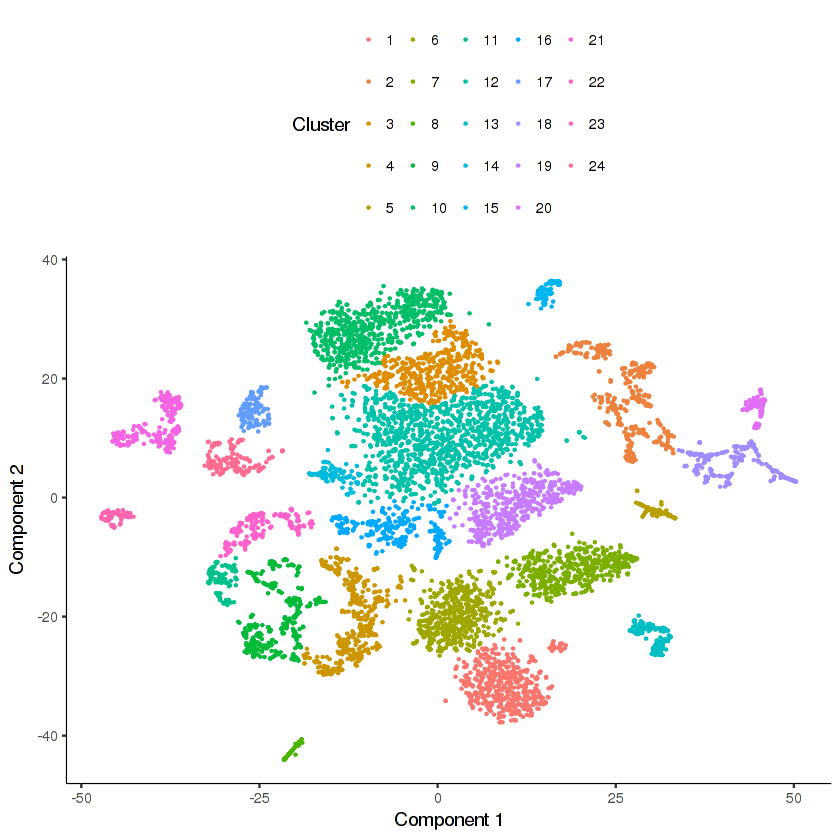

In [70]:
cds = clusterCells_Density_Peak(cds, rho_threshold = 10, delta_threshold = 7, skip_rho_sigma = T)
plot_cell_clusters(cds, cell_size = 0.2)

In [23]:
plot.expr = function(cds, this.gene, thresh=1) {
    gene.id = as.character(fData(cds)[fData(cds)$symbol == this.gene, "gene"])
    pData(cds)$tmp = exprs(cds)[gene.id,] >= thresh
    plot = ggplot(pData(cds), aes(x = tsne_1, y = tsne_2, color = tmp)) +
        geom_point(size = 0.2) +
        scale_color_manual(values = c("grey50", "#F8766D")) +
        guides(color = guide_legend(title = this.gene)) +
        monocle:::monocle_theme_opts() +
        theme(legend.position = "top")
    pData(cds)$tmp = NULL
    return(plot)
}

In [24]:
get.cluster.markers = function(cds) {    
    cluster_means = lapply(1:length(unique(pData(cds)$Cluster)),
                           function(x) rowMeans(exprs(cds)[, pData(cds)$Cluster == x]))
    cluster_means = t(do.call(rbind, cluster_means))
    colnames(cluster_means) = 1:length(unique(pData(cds)$Cluster))
    specificity_scores = apply(cluster_means, 1, function(x) 1 - sum(x >= 0.1*max(x))/length(x))
    cluster_marker_scores = sweep(cluster_means, 1, specificity_scores^3, "*")
    
    cluster_marker_df = melt(cluster_marker_scores)
    names(cluster_marker_df) = c("gene", "cluster", "score")
    cluster_marker_df = inner_join(cluster_marker_df, fData(cds)[, 1:3], by= "gene") %>%
        group_by(cluster) %>% arrange(-score) %>% mutate(rank = rank(-score)) %>%
        filter(rank <= 100) %>% arrange(cluster, rank)
        
    return(cluster_marker_df)
}

In [4]:
plot.clusters = function(cds, cell_size = 0.2) {
    ggplot(pData(cds), aes(x = tsne_1, y = tsne_2, color = cluster.name)) +
        geom_point(size = cell_size) + monocle:::monocle_theme_opts() + theme(legend.position = "left")
}

plot.tissues = function(cds, cell_size = 0.2) {
    ggplot(pData(cds), aes(x = tsne_1, y = tsne_2, color = tissue)) +
        geom_point(size = cell_size) + monocle:::monocle_theme_opts() + theme(legend.position = "left")
}

plot.cell.types = function(cds, cell_size = 0.2) {
    ggplot(pData(cds), aes(x = tsne_1, y = tsne_2, color = cell.type)) +
        geom_point(size = cell_size) + monocle:::monocle_theme_opts() + theme(legend.position = "left")
}

set.cluster.name = function(cds, cluster.name, logical.vec) {
    pData(cds)$cluster.name = ifelse(logical.vec, cluster.name, pData(cds)$cluster.name)
    return(cds)
}

set.tissue = function(cds, tissue, logical.vec) {
    pData(cds)$tissue = ifelse(logical.vec, tissue, pData(cds)$tissue)
    return(cds)
}

set.cell.type = function(cds, cell.type, logical.vec) {
    pData(cds)$cell.type = ifelse(logical.vec, cell.type, pData(cds)$cell.type)
    return(cds)
}

In [20]:
get.gene.id = function(cds, symbol) {
    return(as.character(fData(cds)[fData(cds)$symbol == symbol, "gene"]))
}

expresses.gene = function(cds, symbol, thresh = 1) {
    return(exprs(cds)[get.gene.id(cds, symbol), ] >= thresh)
}

In [3]:
pData(cds)$cluster.name = rep(NA, ncol(cds))
pData(cds)$tissue = rep(NA, ncol(cds))
pData(cds)$cell.type = rep(NA, ncol(cds))

In [26]:
cluster.markers = get.cluster.markers(cds)

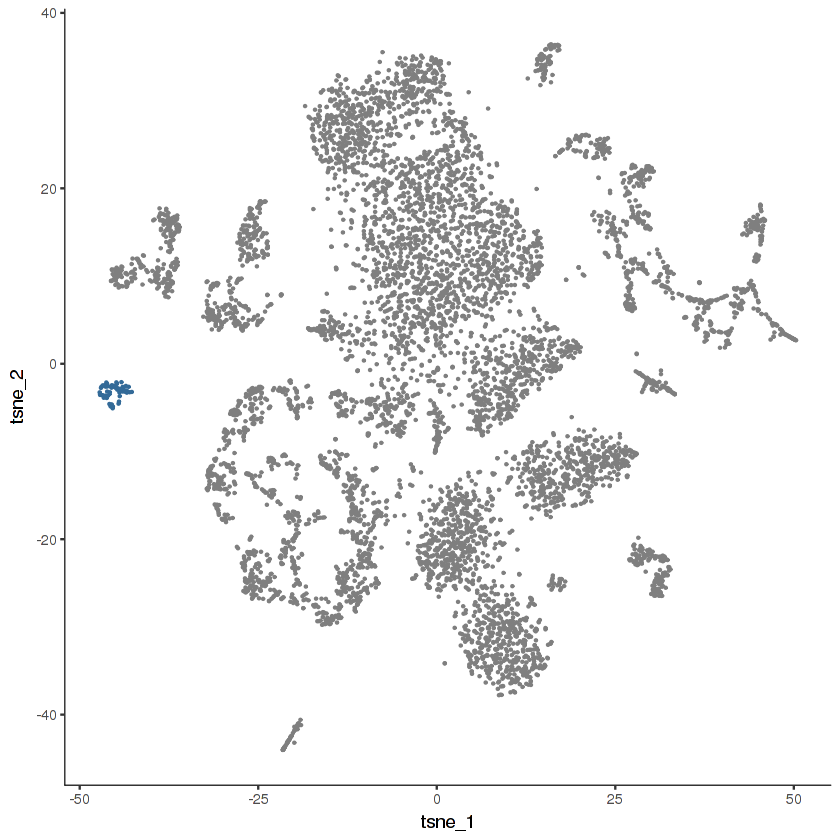

In [15]:
ggplot(pData(cds), aes(x = tsne_1, y = tsne_2, color = ifelse(Cluster == 23, 1, NA))) +
    geom_point(size = 0.2) +
    guides(color = F) +
    monocle:::monocle_theme_opts()

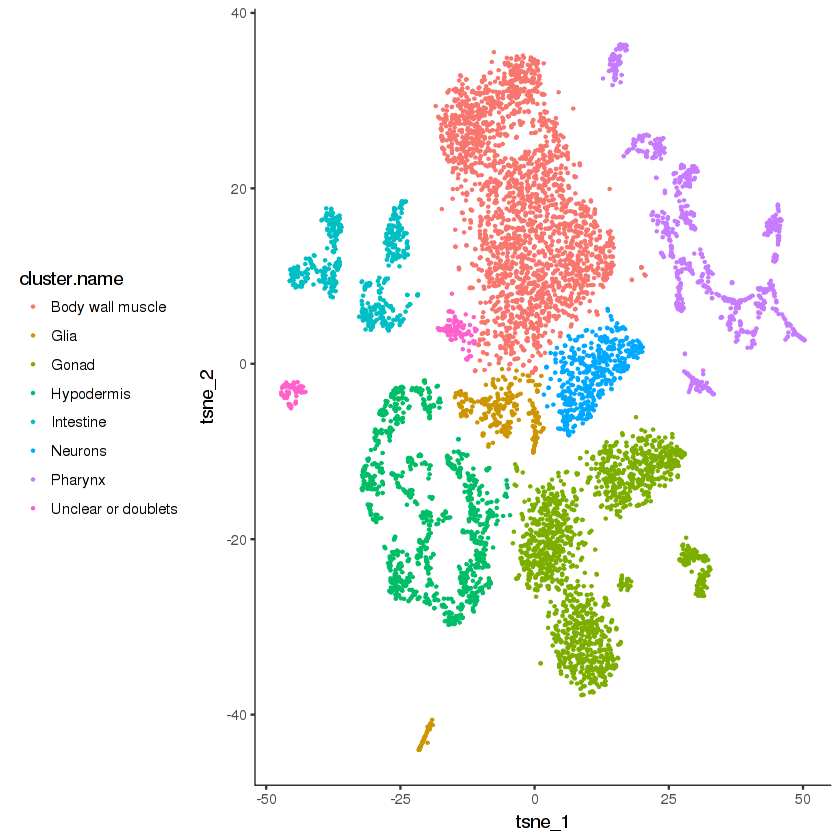

In [5]:
plot.clusters(cds)

In [18]:
cluster.markers %>% filter(cluster == 23) %>% head(20)

gene,cluster,score,symbol,num_cells_expressed,rank
WBGene00206522,23,20.4216227,F14D2.19,119,1
WBGene00017418,23,7.2779187,F13B6.3,132,2
WBGene00006436,23,2.8659531,ttn-1,3925,3
WBGene00007414,23,1.6915954,C07E3.3,196,4
WBGene00019540,23,1.6174027,K08D12.6,565,5
WBGene00019435,23,1.3132123,K06A9.1,546,6
WBGene00000396,23,1.0432210,cdh-4,1523,7
WBGene00018237,23,1.0270062,drd-2,385,8
WBGene00004053,23,0.9952517,tank-1,1065,9
WBGene00013104,23,0.9704064,Y51H4A.8,43,10


In [ ]:
# 1   germline
# 2   pharynx
# 3   body wall muscle
# 4   hypodermis
# 5   pharyngeal gland
# 6   germline
# 7   somatic gonad / sex myoblasts / VPCs
# 8   Am/PH sheath cells
# 9   hypodermis
# 10  body wall muscle
# 11  hypodermis
# 12  body wall muscle
# 13  distal tip cells, plus others?
# 14  doublets?
# 15  pharynx (???)
# 16  unclear--hypodermis?
# 17  intestine
# 18  pharynx
# 19  neurons (??)
# 20  pharynx
# 21  intestine
# 22  hypodermis
# 23  unclear
# 24  intestine

In [4]:
cds = set.cluster.name(cds, "Body wall muscle", pData(cds)$Cluster %in% c(3, 10, 12))
cds = set.tissue(cds, "Body wall muscle", pData(cds)$Cluster %in% c(3, 10, 12))
cds = set.cell.type(cds, "Body wall muscle", pData(cds)$Cluster %in% c(3, 10, 12))

In [5]:
cds = set.cluster.name(cds, "Pharynx", pData(cds)$Cluster %in% c(2, 5, 15, 18, 20))
cds = set.tissue(cds, "Pharynx", pData(cds)$Cluster %in% c(2, 5, 15, 18, 20))

cds = set.cell.type(cds, "Pharyngeal muscle", pData(cds)$Cluster %in% c(2, 15, 18, 20) & (
    expresses.gene(cds, "myo-2") + expresses.gene(cds, "myo-1") +
    expresses.gene(cds, "myo-5") + expresses.gene(cds, "tnt-4") +
    expresses.gene(cds, "mlc-1") + expresses.gene(cds, "mlc-2") >= 2))

cds = set.cell.type(cds, "Pharyngeal epithelia",
    pData(cds)$Cluster %in% c(2, 15, 18, 20) &
    (expresses.gene(cds, "ajm-1") + expresses.gene(cds, "sma-1") +
     expresses.gene(cds, "nas-15") + expresses.gene(cds, "nas-1") +
     expresses.gene(cds, "ifa-1") > 0) &
    (expresses.gene(cds, "myo-2") + expresses.gene(cds, "myo-1") +
     expresses.gene(cds, "myo-5") + expresses.gene(cds, "tnt-4") +
     expresses.gene(cds, "mlc-1") + expresses.gene(cds, "mlc-2") == 0))

cds = set.cell.type(cds, "Pharyngeal gland", pData(cds)$Cluster == 5)

In [6]:
cds = set.cluster.name(cds, "Hypodermis", pData(cds)$Cluster %in% c(4, 9, 11, 22))
cds = set.tissue(cds, "Hypodermis", pData(cds)$Cluster %in% c(4, 9, 11, 22))
cds = set.cell.type(cds, "Hypodermis", pData(cds)$Cluster %in% c(4, 9, 11, 22))

In [20]:
cluster.markers %>% filter(cluster == 3) %>% head(20)

gene,cluster,score,symbol,num_cells_expressed,rank
WBGene00006436,3,35.0641784,ttn-1,3925,1
WBGene00015061,3,9.4324129,cpna-2,3422,2
WBGene00006759,3,7.6936937,unc-22,3566,3
WBGene00006820,3,7.3346662,unc-89,3700,4
WBGene00006789,3,5.6126478,unc-54,3222,5
WBGene00001263,3,4.2498190,emb-9,2747,6
WBGene00002280,3,3.8405828,let-2,2784,7
WBGene00006801,3,3.3907241,unc-68,3402,8
WBGene00000998,3,3.3233918,dig-1,3035,9
WBGene00018024,3,1.7935734,F35A5.1,2245,10


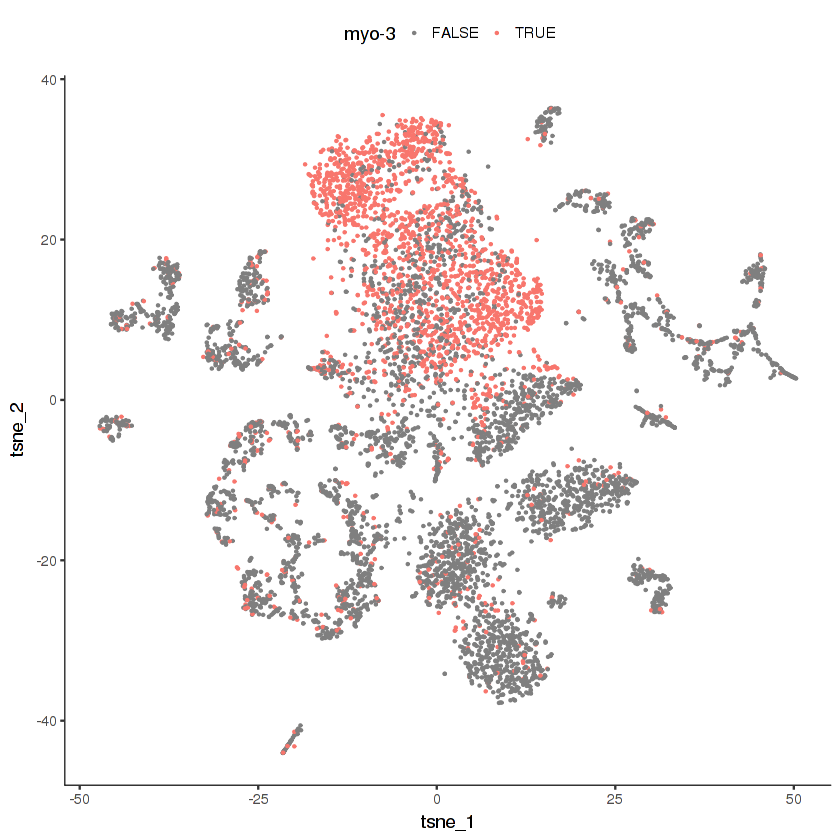

In [21]:
plot.expr(cds, "myo-3")

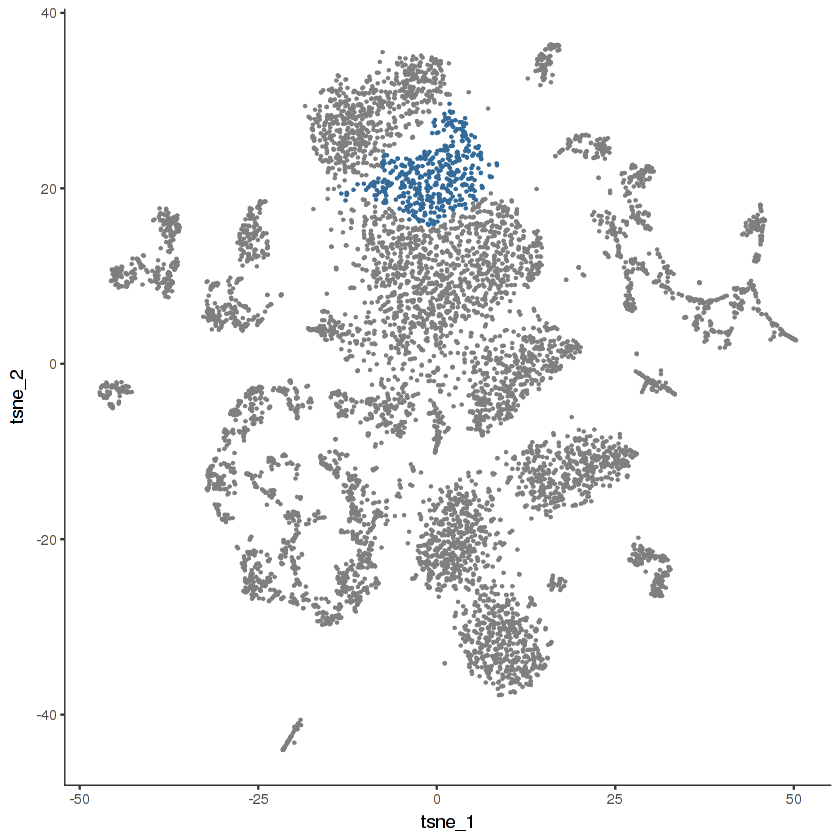

In [22]:
ggplot(pData(cds), aes(x = tsne_1, y = tsne_2, color = ifelse(Cluster == 3, 1, NA))) +
    geom_point(size = 0.2) +
    guides(color = F) +
    monocle:::monocle_theme_opts()

In [7]:
cds = set.cluster.name(cds, "Intestine", pData(cds)$Cluster %in% c(17, 21, 24))
cds = set.tissue(cds, "Intestine", pData(cds)$Cluster %in% c(17, 21, 24))
cds = set.cell.type(cds, "Intestine", pData(cds)$Cluster %in% c(17, 21, 24))

In [8]:
cds = set.cluster.name(cds, "Neurons", pData(cds)$Cluster == 19)
cds = set.tissue(cds, "Neurons", pData(cds)$Cluster == 19)
cds = set.cell.type(cds, "Neurons", pData(cds)$Cluster == 19)

In [9]:
cds = set.cluster.name(cds, "Glia", pData(cds)$Cluster %in% c(8, 16))
cds = set.tissue(cds, "Glia", pData(cds)$Cluster %in% c(8, 16))

# vap-1, fig-1
cds = set.cell.type(cds, "Am/PH sheath cells", pData(cds)$Cluster == 8)

In [10]:
cds = set.cluster.name(cds, "Gonad", pData(cds)$Cluster %in% c(1, 6, 7, 13))
cds = set.tissue(cds, "Gonad", pData(cds)$Cluster %in% c(1, 6, 7, 13))

cds = set.cell.type(cds, "Germline", pData(cds)$Cluster %in% c(1, 6))
cds = set.cell.type(cds, "Somatic gonad/SM/VPC", pData(cds)$Cluster == 7)
cds = set.cell.type(cds, "Distal tip cells", pData(cds)$Cluster == 13)

In [11]:
cds = set.cluster.name(cds, "Unclear", pData(cds)$Cluster %in% c(14, 23))

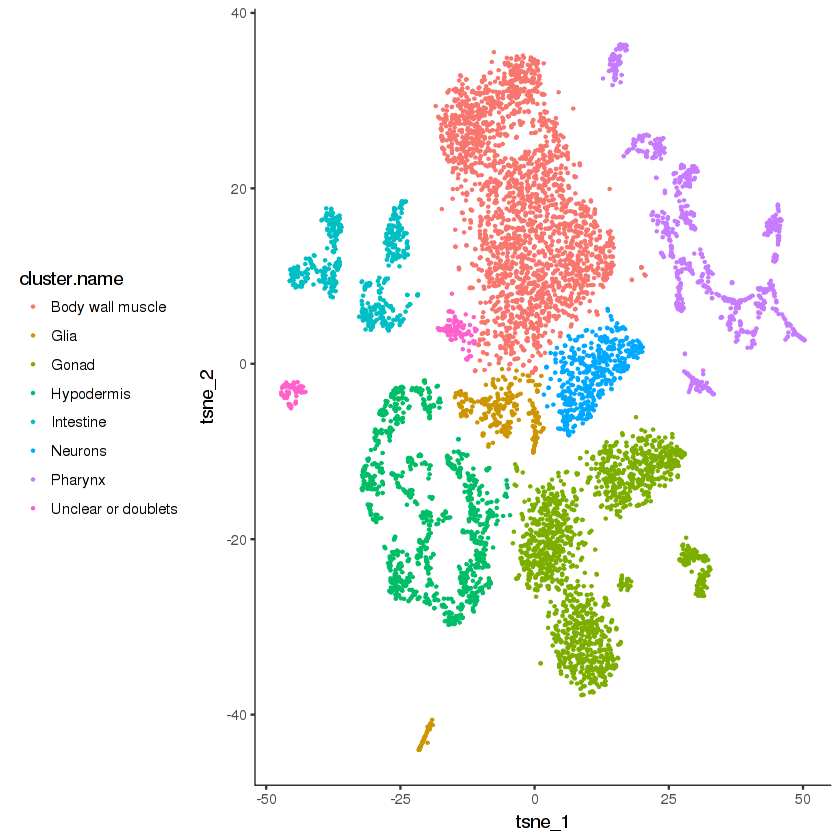

In [21]:
plot.clusters(cds)

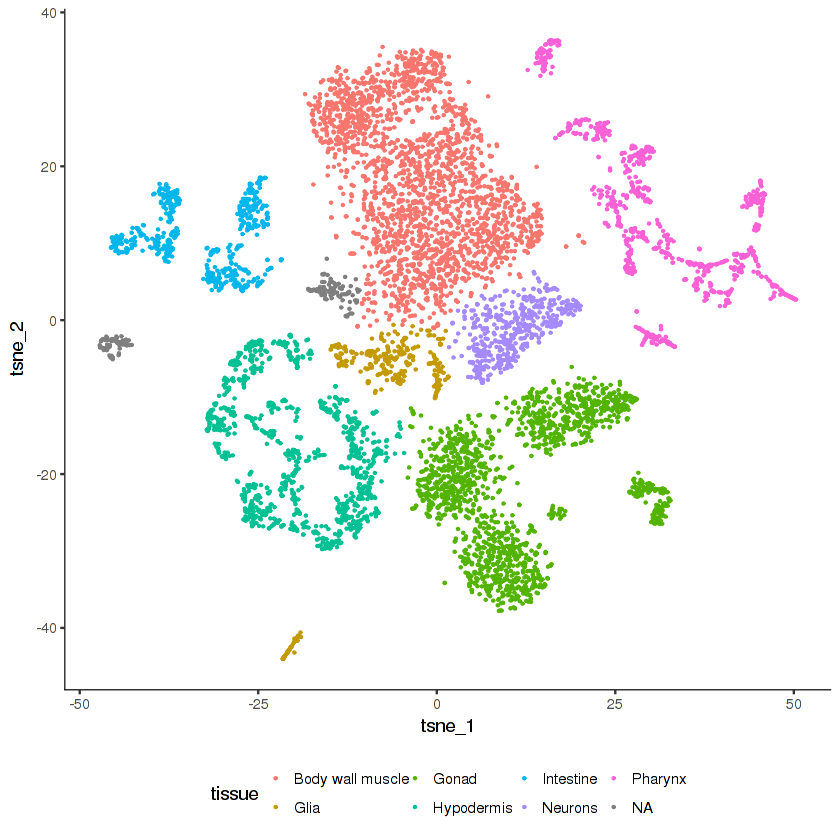

In [55]:
plot.tissues(cds)

In [58]:
cds.intestine = cds[, with(pData(cds), !is.na(tissue) & tissue == "Intestine")]
dim(cds.intestine)

cds.intestine = estimateSizeFactors(cds.intestine)
cds.intestine = estimateDispersions(cds.intestine)
cds.intestine = detectGenes(cds.intestine, 0.1)

Features  Samples 
   20271      552

Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message in `[<-.data.frame`(`*tmp*`, res$mu == 0, value = structure(list(:
“provided 1 variable to replace 0 variables”Warning message in `[<-.data.frame`(`*tmp*`, res$mu == 0, value = structure(list(:
“provided 1 variable to replace 0 variables”Removing 234 outliers


In [110]:
set.seed(42)
cds.intestine = reduceDimension(
    cds.intestine, max_components = 2, norm_method = "log",
    num_dim = 10, reduction_method = "tSNE",
    verbose = T)

pData(cds.intestine)$tsne_1 = reducedDimA(cds.intestine)[1,]
pData(cds.intestine)$tsne_2 = reducedDimA(cds.intestine)[2,]

Remove noise by PCA ...
Reduce dimension by tSNE ...


Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

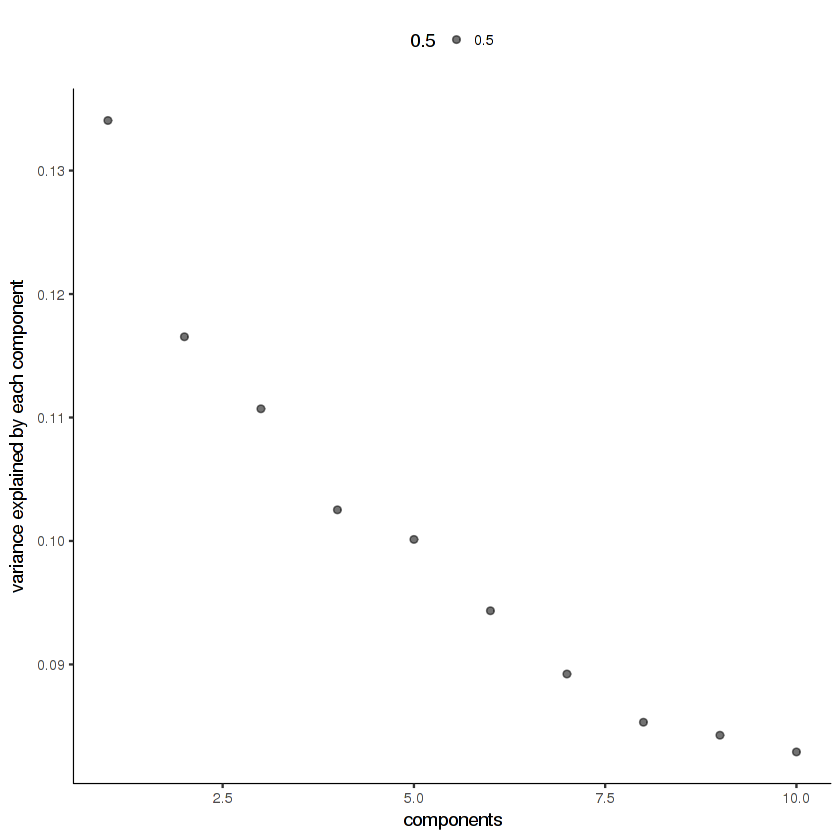

In [111]:
plot_pc_variance_explained(cds.intestine)

Distance cutoff calculated to 2.028361 


the length of the distance: 152076


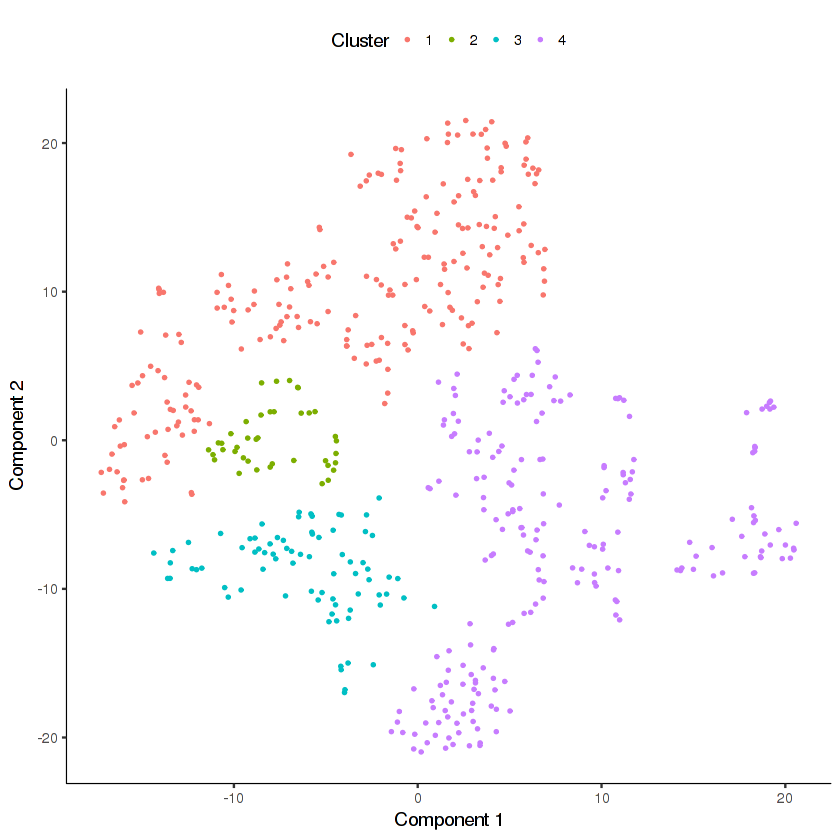

In [112]:
cds.intestine = clusterCells_Density_Peak(cds.intestine)
plot_cell_clusters(cds.intestine, cell_size = 0.5)

Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

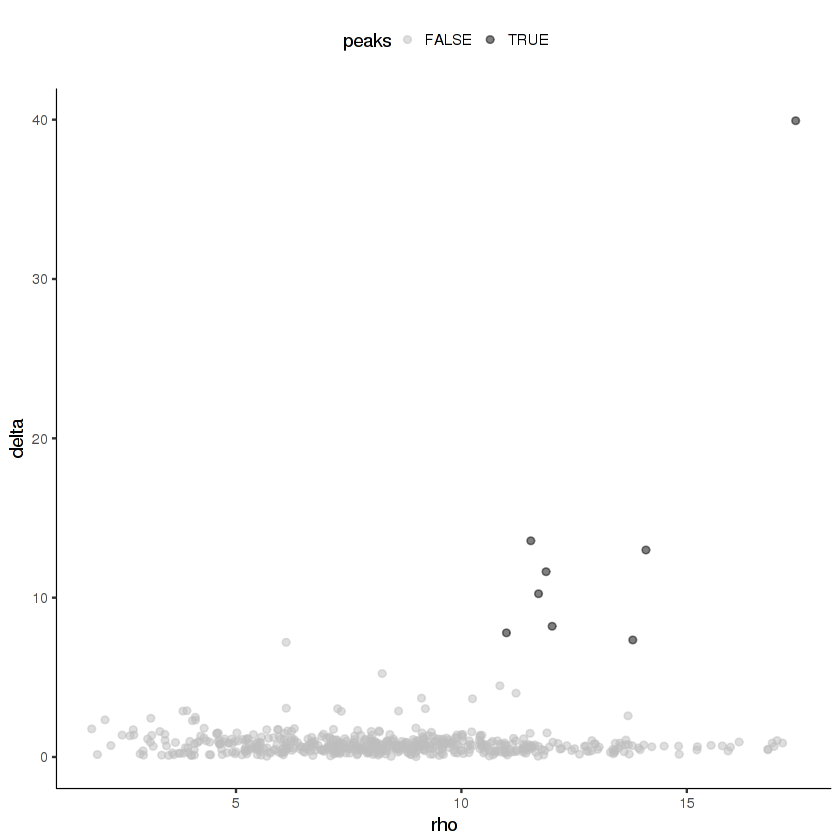

In [117]:
plot_rho_delta(cds.intestine, rho_threshold = 8, delta_threshold = 6)

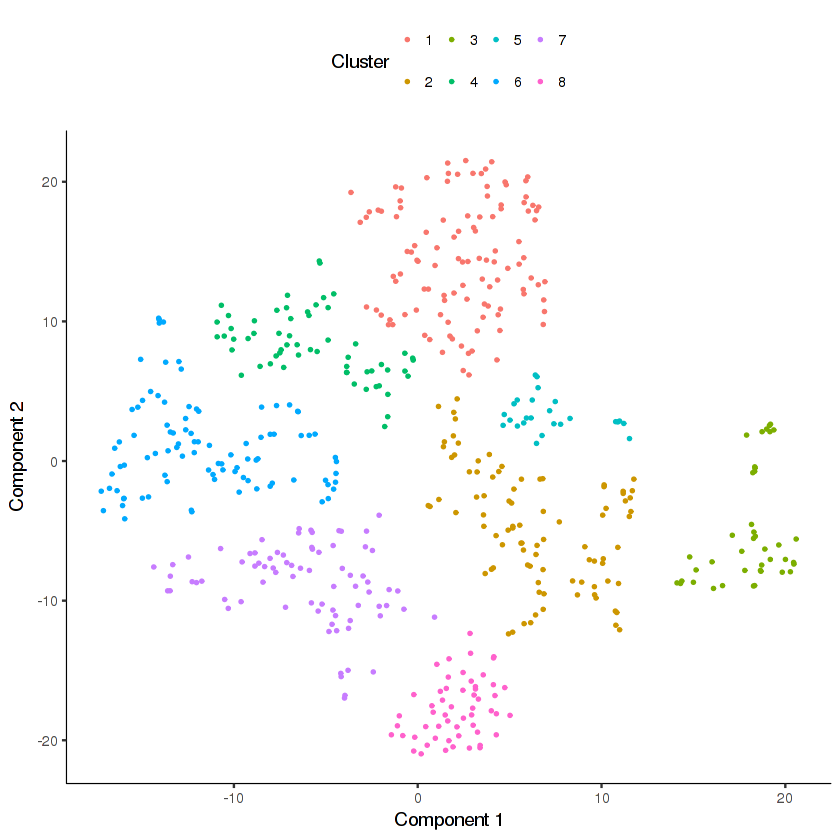

In [118]:
cds.intestine = clusterCells_Density_Peak(cds.intestine,
    rho_threshold = 8, delta_threshold = 6, skip_rho_sigma = T)
plot_cell_clusters(cds.intestine, cell_size = 0.5)

In [119]:
ook = get.cluster.markers(cds.intestine)

In [129]:
ook %>% filter(cluster != 3) %>% arrange(-score) %>% head(40)

gene,cluster,score,symbol,num_cells_expressed,rank
WBGene00018237,1,2.3937640,drd-2,245,1
WBGene00020128,5,2.2400000,R193.2,153,1
WBGene00017892,5,2.1200000,F28B4.3,166,2
WBGene00006436,5,1.6614062,ttn-1,190,3
WBGene00017892,2,1.5152778,F28B4.3,166,1
WBGene00007331,1,1.4774170,pho-11,94,2
WBGene00206522,1,1.3673270,F14D2.19,20,3
WBGene00006436,1,1.3518066,ttn-1,190,4
WBGene00020128,4,1.2796610,R193.2,153,1
WBGene00017892,4,1.2733051,F28B4.3,166,2


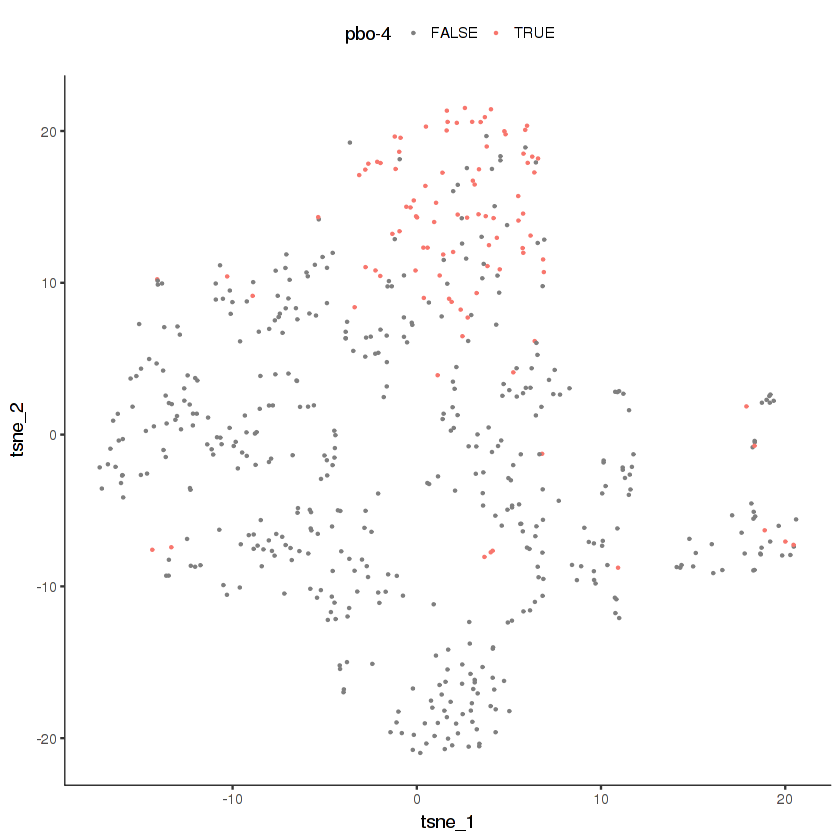

In [132]:
plot.expr(cds.intestine, "pbo-4")

In [ ]:
# 3 = doublets

In [ ]:
# pbo-4 posterior intestine
# pho-11, R193.2, clec-160

Since we'll only be using intestine cells from experiment 2 in downstream analyses, we'll only make note of doublets that are present in the intestine cell clusters.

In [12]:
pData(cds)$tissue = ifelse(
    pData(cds)$cell %in% pData(cds.intestine)$cell[pData(cds.intestine)$Cluster %in% c(3)],
    NA, pData(cds)$tissue)

pData(cds)$cell.type = ifelse(
    pData(cds)$cell %in% pData(cds.intestine)$cell[pData(cds.intestine)$Cluster %in% c(3)],
    NA, pData(cds)$cell.type)

In [13]:
doublet.cell.ids = c(
    as.character(pData(cds.intestine)$cell[pData(cds.intestine)$Cluster %in% c(3)]))

In [14]:
length(doublet.cell.ids)
length(unique(doublet.cell.ids))
pData(cds)[pData(cds)$cell %in% doublet.cell.ids,] %>%
    group_by(tissue) %>% summarize(n = n()) %>% arrange(-n) %>% head(2)
pData(cds)[pData(cds)$cell %in% doublet.cell.ids,] %>%
    group_by(cell.type) %>% summarize(n = n()) %>% arrange(-n) %>% head(2)

[1] 41

[1] 41

tissue,n
NA,41


cell.type,n
NA,41


In [17]:
save.image("RData/L2.experiment.2.RData")

In [18]:
cds.experiment.2 = cds
doublet.ids.experiment.2 = doublet.cell.ids

save(list = c(
        "cds.experiment.2", "cds.intestine", "doublet.ids.experiment.2"),
    file = "RData/L2.experiment.2.no-cruft.RData")

rm(cds.experiment.2)
rm(doublet.ids.experiment.2)